# MCMC from scratch

Here we will write a simple python program that will perform the Metropolis algorithm. In order to sample the posterior of the probability function given supernovae data.

## Loglike computation

First we need to be able to compute the likelihood of the data given some parameters. We will actually compute the logarithm of the likelihood as it is easier to handle for the computer.

First let's import some basic libraries:

In [1]:
import numpy as np
import scipy.integrate as integrate

Now let's use a scipy integrator in order to obtain the luminosity distance

In [11]:
def E(z,OmDE):
    """
    This function computes the integrand for the computation of the luminosity distance for a flat universe
    z -> float
    OmDE -> float
    gives
    E -> float
    """
    return 1/np.sqrt((1-OmDE)*(1+z)**3+OmDE)

def dl(z,OmDE,h=0.7):
    """
    This function computes the luminosity distance
    z -> float
    OmDE -> float
    h ->float
    returns
    dl -> float
    """
    inte=integrate.quad(E,0,z,args=(OmDE))
    # Velocidad del sonido en km/s
    c = 299792.458
    # Factor de Hubble
    Ho = 100*h
    return c*(1+z)/Ho * inte[0]

We now have to load the supernovae data in order to compare it with the theoretical data

In [3]:
zandmu = np.loadtxt('../data/SCPUnion2.1_mu_vs_z.txt', skiprows=5,usecols=(1,2))
covariance = np.loadtxt('../data/SCPUnion2.1_covmat_sys.txt')

In [4]:
type(zandmu)

numpy.ndarray

In [5]:
np.shape(zandmu[1])

(2,)

How does this data look like?

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

The supernovae

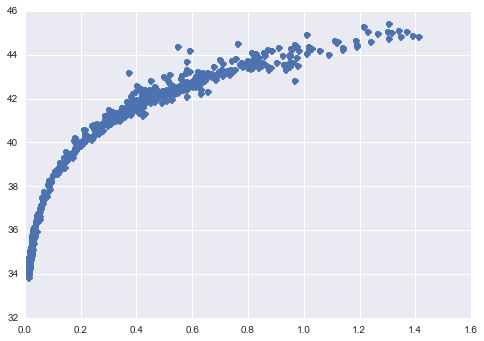

In [7]:
plt.plot(zandmu[:,0],zandmu[:,1],'o')

In [8]:
heat = np.log(abs(covariance))

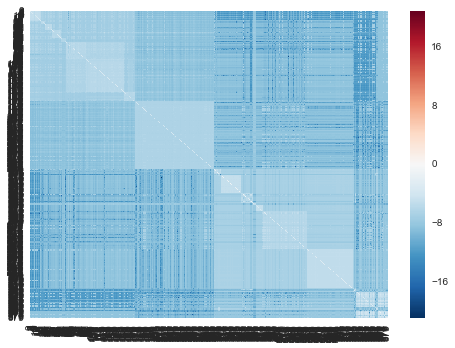

In [9]:
sb.set()
sb.heatmap(heat)

<Container object of 3 artists>

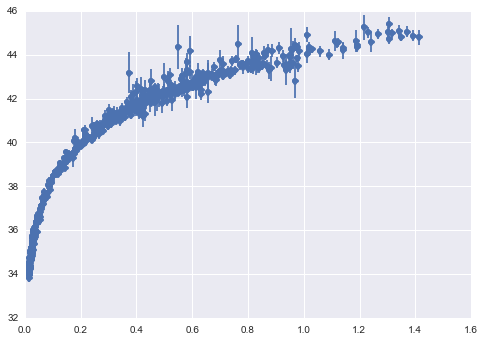

In [12]:
yerr = np.loadtxt('../data/SCPUnion2.1_mu_vs_z.txt', skiprows=5,usecols=[3])
plt.errorbar(zandmu[:,0],zandmu[:,1], yerr=yerr, fmt='o')

Now we can compute the log like.

In [14]:
dl = np.vectorize(dl)
def loglike(params,h=0.7):
    """
    This function computes the logarithm of the likelihood. It recieves a vector
    params-> vector with one component (Omega Dark Energy)
    """
    OmDE = params[0]
# Ahora quiero calcular la diferencia entre el valor reportado y el calculado
    delta = 5.*np.log10(dl(zandmu[:,0],OmDE,h))+25-zandmu[:,1]
    chisquare=np.dot(delta,np.dot(np.linalg.inv(covariance),delta))
    return -chisquare/2


In [23]:
table_omega = np.arange(0.,1.,0.01)
tableprob=[loglike([hola]) for hola in table_omega]


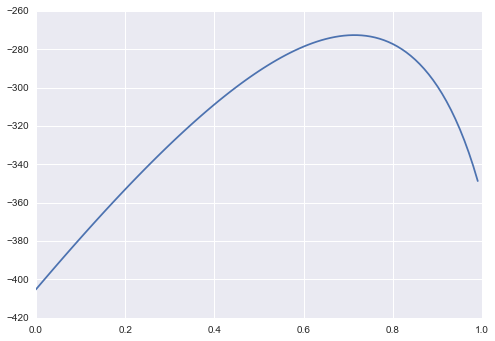

In [24]:
plt.plot(table_omega,tableprob)

In [15]:
loglike([0.6])

-278.58971768190293

All for today!

# You can try jla data

From http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html download  jla_likelihood_v6.tgz and covmat_v6.tgz.

- The supernovae info is contained in the file jla_lcparams.txt go that file and remove the "#" from the first line

- Load it using genfromtxt

In [3]:
jla_dataset = np.genfromtxt('../data/jla/data/jla_lcparams.txt', names=True, dtype=None)

This function is very clever and you can use the names of the variables instead of the number of the corresponding column, like that:

In [4]:
jla_dataset['zcmb']

array([ 0.503084,  0.580724,  0.494795,  0.345928,  0.677662,  0.610712,
        0.866494,  0.330932,  0.798566,  0.449562,  0.371443,  0.291718,
        0.35582 ,  0.461274,  0.28361 ,  0.632234,  0.466414,  0.268624,
        0.94689 ,  0.924917,  0.693165,  0.625233,  0.896944,  0.608261,
        0.789054,  0.578292,  0.59028 ,  0.719626,  0.210032,  0.76659 ,
        0.858513,  0.367904,  0.558746,  0.848509,  0.99639 ,  0.776594,
        0.582932,  0.583743,  0.796552,  0.588721,  0.913473,  0.768587,
        0.948455,  0.513793,  0.733609,  0.637701,  0.765588,  0.434861,
        0.983407,  0.583743,  0.700631,  0.662058,  0.838126,  0.621874,
        0.370586,  0.416632,  0.35857 ,  0.451681,  0.522762,  0.733996,
        0.701965,  0.742008,  0.746118,  0.34956 ,  0.591835,  0.514746,
        0.620632,  0.643646,  1.002795,  0.470586,  0.610643,  0.263487,
        0.358336,  0.742697,  0.451556,  0.910752,  0.552605,  0.337534,
        0.750681,  0.983777,  0.822697,  0.813696, 

You can ask which are the different columns or info in that file:

In [5]:
jla_dataset.dtype.names

('name',
 'zcmb',
 'zhel',
 'dz',
 'mb',
 'dmb',
 'x1',
 'dx1',
 'color',
 'dcolor',
 '3rdvar',
 'd3rdvar',
 'cov_m_s',
 'cov_m_c',
 'cov_s_c',
 'set',
 'ra',
 'dec',
 'biascor')

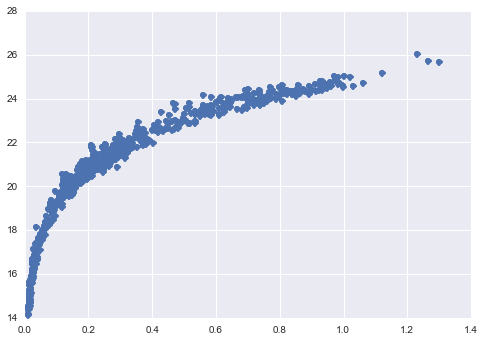

In [7]:
plt.plot(jla_dataset['zcmb'],jla_dataset['mb'],'o')

From http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html download  covmat_v6.tgz and use the example.py to compute the covariance matrix for a particular alpha, beta.
- Copy the contents of example.py here
- Change the names of the files according to your own file order
- Change all the "numpy" for "np"

In [8]:
import pyfits
import glob
def mu_cov(alpha, beta):
    """ Assemble the full covariance matrix of distance modulus

    See Betoule et al. (2014), Eq. 11-13 for reference
    """
    Ceta = sum([pyfits.getdata(mat) for mat in glob.glob('../data/jla/covmat/C*.fits')])

    Cmu = np.zeros_like(Ceta[::3,::3])
    for i, coef1 in enumerate([1., alpha, -beta]):
        for j, coef2 in enumerate([1., alpha, -beta]):
            Cmu += (coef1 * coef2) * Ceta[i::3,j::3]

    # Add diagonal term from Eq. 13
    sigma = np.loadtxt('../data/jla/covmat/sigma_mu.txt')
    sigma_pecvel = (5 * 150 / 3e5) / (np.log(10.) * sigma[:, 2])
    Cmu[np.diag_indices_from(Cmu)] += sigma[:, 0] ** 2 + sigma[:, 1] ** 2 + sigma_pecvel ** 2
    
    return Cmu


Now you can compute the covariance matrix but it will depend on the nuisanse parammeters alfa and beta

In [9]:
Cmu = mu_cov(0.13, 3.1)

In [10]:
np.shape(Cmu)

(740, 740)

Now I can compute the loglike in the same way as for the union2.1 data. Just copy the loglike function from before, add as params
 - OmDE
 - alpha
 - beta
 - M_b
For the covariance matrix use the function from before, and instead of the "zandmu" variable use jla_dataset

In [15]:
 def loglike_jla(params,h=0.7):
    """
    This function computes the logarithm of the likelihood. It recieves a vector
    params-> vector with three components (Omega Dark Energy, alpha, beta and M_b)
    """
    OmDE = params[0]
    alpha = params[1]
    beta = params[2]
    MB = params[3]
    covariance = mu_cov(alpha, beta)
    inv_covariance=np.linalg.inv(covariance)
# Ahora quiero calcular la diferencia entre el valor reportado y el calculado
    mu_obs = jla_dataset['mb']-(MB-alpha*jla_dataset['x1']+beta*jla_dataset['color'])
    mu_teo = 5.*np.log10(dl(jla_dataset['zcmb'],OmDE,h))+25
    delta = mu_teo - mu_obs
    chisquare = np.dot(delta,np.dot(inv_covariance,delta))
    return -chisquare/2

In [16]:
param = [0.65,0.13,3.1,-20]
loglike_jla(param)

-2343.1642968305632

In [17]:
param = [0.7,0.13,3.1,-19]
loglike_jla(param)

-358.18533951434921

And now we have a likelihood that depends on 4 parameters!